<a href="https://colab.research.google.com/github/letun1987/---/blob/main/%D0%A2%D0%B5%D1%81%D1%82%D0%BE%D0%B2%D0%BE%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%D0%A0_%D0%9A%D0%BE%D0%BD%D1%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U deep-translator #https://deep-translator.readthedocs.io/en/stable/README.html

In [ ]:
import pandas as pd
import numpy as np
from deep_translator import GoogleTranslator
import time
import re

In [ ]:
df = pd.read_excel('Тестовое задание Менеджер баз данных.xlsx', sheet_name="2.TEST")

In [ ]:
df.sample(5)

,First Name,Last Name,Position,Должность,Иерархия должностей,Company,Location,Email1,Email2,Email3,Email4,Email5,Mobile Phone1,Mobile Phone2,Mobile Phone3,Work Phone1,Work Phone2,Work Phone3,Unknown Phone1
38,Nikita,Nikitin,"CTO, Founder","Технический директор, основатель",NaN,DNK IT Solutions,"Bishkek, Kyrgyzstan",nikita.omen666@gmail.com,NaN,NaN,NaN,NaN,+996555900375,NaN,NaN,NaN,NaN,NaN,NaN
43,Dmitriy,Alexashov,Co-Founder,Соучредитель,NaN,OneVision Payments,Kazakhstan,alex@aviapoisk.com,d.alexashov@onevision.kz,da@onevision.kz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,Singh,Amarendra,"CTO, ArcelorMittal Tubular Product, Aktau","Технический директор, АрселорМиттал Трубная пр...",NaN,"ArcelorMittal, AMTP, Aktau, Kazakhstan",Kazakhstan,amarendra.singh@arcelormittal.com,singh_amarendra@dofasco.ca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77775995066
61,Abul,Ala Nauman,CTO / Technical Director,Технический директор,Директор направления,ONE PLATFORM MEDIA LLC,"Tashkent, Uzbekistan",aanauman@gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,Max,Tomilov,CTO,Технический директор,Директор направления,Softvelum,"Bishkek, Kyrgyzstan",max.tomilov@gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   First Name           102 non-null    object 
 1   Last Name            102 non-null    object 
 2   Position             102 non-null    object 
 3   Должность            102 non-null    object 
 4   Иерархия должностей  36 non-null     object 
 5   Company              102 non-null    object 
 6   Location             102 non-null    object 
 7   Email1               96 non-null     object 
 8   Email2               35 non-null     object 
 9   Email3               8 non-null      object 
 10  Email4               3 non-null      object 
 11  Email5               1 non-null      object 
 12  Mobile Phone1        34 non-null     object 
 13  Mobile Phone2        6 non-null      object 
 14  Mobile Phone3        3 non-null      object 
 15  Work Phone1          6 non-null      obj

# **Задание №1**

**Перевести ФИО на русский язык**

In [ ]:
def translate(row): # Запускаем гугл переводчик
  translated = GoogleTranslator(source='en', target='ru').translate(row)
  return translated

df['First Name'] = df['First Name'].apply(translate)
df['Last Name'] = df['Last Name'].apply(translate)

In [ ]:
for i in df['Last Name']: # Проверяем остались ли значения без перевода
  if bool(re.search('[\u0400-\u04FF]', i)) == False:
    print(i)
  else:
    pass

Nikishin


In [ ]:
for i in df['First Name']:
  if bool(re.search('[\u0400-\u04FF]', i)) == False:
    print(i)
  else:
    pass

In [ ]:
"""
source='auto' изменяем параметр на автоматическое определение языка, это
связано с алгоритмом работы переводчика google, он не всегда с первого раза
переводит имена и фамилии.
"""
def translate(row):
  translated = GoogleTranslator(source='auto', target='ru').translate(row)
  return translated

df['Last Name'] = df['Last Name'].apply(translate)

for i in df['Last Name']:
  if bool(re.search('[\u0400-\u04FF]', i)) == False:
    print(i)
  else:
    pass

In [ ]:
df.sample(5)

,First Name,Last Name,Position,Должность,Иерархия должностей,Company,Location,Email1,Email2,Email3,Email4,Email5,Mobile Phone1,Mobile Phone2,Mobile Phone3,Work Phone1,Work Phone2,Work Phone3,Unknown Phone1
71,Иван,Никишин,Deputy CTO,Заместитель технического директора,NaN,Digital Aviation Solutions,"Tashkent, Uzbekistan",bangladeshzudwamorrison@gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Валера,Геленова,"Co-Founder, CTO","Соучредитель, технический директор",NaN,versta,Kazakhstan,vg@versta24.ru,vgelenava@versta24.ru,vg@versta.io,rebel2001@mail.ru,NaN,+7 921 916-21-13,+7 912 916-21-13,NaN,NaN,NaN,NaN,NaN
26,Римский,Надеин,"Co-Founder, CPO & CTO","Соучредитель, главный исполнительный директор ...",NaN,Rocket Pharm | Health-tech,"Calcutta, India",smozjo@gmail.com,roman.nadein@rocketfirm.com,NaN,NaN,NaN,+7 705 834 1424,NaN,NaN,NaN,NaN,NaN,NaN
89,Фарход,Чориев,Исполнительный директор,Исполнительный директор,NaN,F4-Group,"Dushanbe, Tajikistan",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,+7 707 146 7080
13,Александр,Евстратов,"IT Advisor, CTIO","Советник по информационным технологиям, CTIO",NaN,JSC Uzmetkombinat,"Uzbekistan, Uzbekistan",alexanderaevstratov@gmail.com,alexevstratov@mail.ru,NaN,NaN,NaN,+7 903 593-55-24,NaN,NaN,NaN,NaN,NaN,NaN


# **Задание №2**

**Выявить дубли персон (указать критерии дедубликации)**

Посмотрим на наши данные, у нас 102 строки, значения без пропусков находятся в столбцах First Name, Last Name, Position, Location, Company. В этих столбцах полный набор данных, соответственно для поиска дублей необходимо сравнивать значения из этих столбцов. Сравнивать по именам смысла нет, Вадимов и Анатолиев может быть сколь угодно много, а вот, например, поиск людей с одинаковой фамилией может дать хороший результат.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   First Name           102 non-null    object 
 1   Last Name            102 non-null    object 
 2   Position             102 non-null    object 
 3   Должность            102 non-null    object 
 4   Иерархия должностей  36 non-null     object 
 5   Company              102 non-null    object 
 6   Location             102 non-null    object 
 7   Email1               96 non-null     object 
 8   Email2               35 non-null     object 
 9   Email3               8 non-null      object 
 10  Email4               3 non-null      object 
 11  Email5               1 non-null      object 
 12  Mobile Phone1        34 non-null     object 
 13  Mobile Phone2        6 non-null      object 
 14  Mobile Phone3        3 non-null      object 
 15  Work Phone1          6 non-null      obj

In [ ]:
"""
удалим все лишние символы из столбца с фамилиями и приведем все буквы
к нижнему регистру, потому что Иванов != иванов
"""

def normal_row(row):
  row = row.lower().strip()
  row = re.sub('[\W_]+', ' ', row)
  return row

df['First Name'] = df['First Name'].apply(normal_row)

In [ ]:
def normal_row(row):
  row = row.lower().strip()
  row = re.sub('[\W_]+', ' ', row)
  return row

df['Last Name'] = df['Last Name'].apply(normal_row)

In [ ]:
def normal_row(row):
  row = row.lower().strip()
  row = re.sub('[\W_]+', ' ', row)
  return row

df['Company'] = df['Company'].apply(normal_row)

In [ ]:
v = df['Last Name'].value_counts()
v

евстратов    2
д            2
ребрышки     2
никитин      2
луковкин     1
            ..
амарендра    1
билалов      1
бекеш        1
безручкин    1
ерназаров    1
Name: Last Name, Length: 98, dtype: int64

Проанализировав данные, например, можно увидеть, что полное совпадение по всем столбцам есть только в одном случае - "Кирилл	ребрышки". А вот информация об "Александр	евстратов" необходимо, актуализировать, т.к. по данным из таблицы работает в разных компаниях, но email и телефон полностью совпадают.

In [ ]:
"""
Здесь мы делаем группировку по фамили, и если фамилии встречаются более 2 раз,
то мы их выводим отсортированным фреймом и проводим дальнейший анализ
"""
df.groupby('Last Name').filter(lambda x : x['Last Name'].shape[0]>=2).sort_values(by=['Last Name'])

,First Name,Last Name,Position,Должность,Иерархия должностей,Company,Location,Email1,Email2,Email3,Email4,Email5,Mobile Phone1,Mobile Phone2,Mobile Phone3,Work Phone1,Work Phone2,Work Phone3,Unknown Phone1
31,санжар,д,"Co-Founder, CTO","Соучредитель, технический директор",NaN,oitech io,"Almaty, Kazakhstan",dauylov.sanzhar@gmail.com,NaN,NaN,NaN,NaN,+7 702 355 0637,NaN,NaN,NaN,NaN,NaN,NaN
56,артем,д,Engineer,Инженер,NaN,private company,"Tashkent, Uzbekistan",dractw@gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,александр,евстратов,"IT Advisor, CTIO","Советник по информационным технологиям, CTIO",NaN,jsc uzmetkombinat,"Uzbekistan, Uzbekistan",alexanderaevstratov@gmail.com,alexevstratov@mail.ru,NaN,NaN,NaN,+7 903 593-55-24,NaN,NaN,NaN,NaN,NaN,NaN
35,александр,евстратов,"IT Advisor, CTIO","Советник по информационным технологиям, CTIO",NaN,interpay,"Uzbekistan, Uzbekistan",alexanderaevstratov@gmail.com,alexevstratov@mail.ru,NaN,NaN,NaN,+7 903 593-55-24,NaN,NaN,NaN,NaN,NaN,NaN
38,никита,никитин,"CTO, Founder","Технический директор, основатель",NaN,dnk it solutions,"Bishkek, Kyrgyzstan",nikita.omen666@gmail.com,NaN,NaN,NaN,NaN,+996555900375,NaN,NaN,NaN,NaN,NaN,NaN
66,александр,никитин,Менеджер отдела центрального управления сетью ...,Менеджер отдела центрального управления сетью ...,NaN,kcell ао,"Almaty, Kazakhstan",alexandr.nikitin@kcell.kz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,кирилл,ребрышки,Co-founder and CEO / CTO,Соучредитель и генеральный директор / техничес...,ТОП,demografy,"Tashkent, Uzbekistan",kiril.rebrov@gmail.com,kirill.rebrov@isdk.pro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,кирилл,ребрышки,Co-founder and CEO / CTO,Соучредитель и генеральный директор / техничес...,ТОП,demografy,"Tashkent, Uzbekistan",kiril.rebrov@gmail.com,kirill.rebrov@isdk.pro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
"""
данный метод выводит все строки, которые являются полными дубликатами
"""
duplicate = df[df.duplicated()]
duplicate

,First Name,Last Name,Position,Должность,Иерархия должностей,Company,Location,Email1,Email2,Email3,Email4,Email5,Mobile Phone1,Mobile Phone2,Mobile Phone3,Work Phone1,Work Phone2,Work Phone3,Unknown Phone1
97,кирилл,ребрышки,Co-founder and CEO / CTO,Соучредитель и генеральный директор / техничес...,ТОП,demografy,"Tashkent, Uzbekistan",kiril.rebrov@gmail.com,kirill.rebrov@isdk.pro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
"""
посмотрим на компании, которые встречаются более 2-х раз
"""
df.groupby('Company').filter(lambda x : x['Company'].shape[0]>=2).sort_values(by=['Company'])

,First Name,Last Name,Position,Должность,Иерархия должностей,Company,Location,Email1,Email2,Email3,Email4,Email5,Mobile Phone1,Mobile Phone2,Mobile Phone3,Work Phone1,Work Phone2,Work Phone3,Unknown Phone1
2,аскар,акшабаев,"Co-Founder, CTO","Соучредитель, технический директор",NaN,1fit,"Almaty, Kazakhstan",askarakshabayev@gmail.com,askar.akshabayev@gmail.com,askar@1fit.app,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,+7 771 408 8103
34,кайрат,айтпаев,Chief Data Officer,Главный специалист по данным,NaN,1fit,"Almaty, Kazakhstan",kairat100@gmail.com,NaN,NaN,NaN,NaN,+7 701 242 7339,NaN,NaN,NaN,NaN,NaN,NaN
60,кирилл,ребрышки,Co-founder and CEO / CTO,Соучредитель и генеральный директор / техничес...,ТОП,demografy,"Tashkent, Uzbekistan",kiril.rebrov@gmail.com,kirill.rebrov@isdk.pro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,кирилл,ребрышки,Co-founder and CEO / CTO,Соучредитель и генеральный директор / техничес...,ТОП,demografy,"Tashkent, Uzbekistan",kiril.rebrov@gmail.com,kirill.rebrov@isdk.pro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,александр,евстратов,"IT Advisor, CTIO","Советник по информационным технологиям, CTIO",NaN,interpay,"Uzbekistan, Uzbekistan",alexanderaevstratov@gmail.com,alexevstratov@mail.ru,NaN,NaN,NaN,+7 903 593-55-24,NaN,NaN,NaN,NaN,NaN,NaN
36,рауан,майемир,CEO,Генеральный директор,ТОП,interpay,Kazakhstan,rauan1987@gmail.com,rauan@maemirov.com,NaN,NaN,NaN,+7 700 459 0789,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
"""
Вернем обратно заглавные буквы именам, фамилиям, компаниям.
"""

df['First Name'] = df['First Name'].map(lambda x: x.title())
df['Last Name'] = df['Last Name'].map(lambda x: x.title())
df['Company'] = df['Company'].map(lambda x: x.title())

In [ ]:
df.head(5)

,First Name,Last Name,Position,Должность,Иерархия должностей,Company,Location,Email1,Email2,Email3,Email4,Email5,Mobile Phone1,Mobile Phone2,Mobile Phone3,Work Phone1,Work Phone2,Work Phone3,Unknown Phone1
0,Дмитрий,Луковкин,"CTO, Head of Artificial Intelligence - Zyfra R...","Технический директор, руководитель направления...",NaN,Zyfra Company,"Tashkent, Uzbekistan",dmitry.lukovkin@gmail.com,dlukovkin@gmail.com,dlukovkin@yahoo.com,dmitrylukovkin@gmail.com,dmitry.lukovkin@zyfra.com,+7 903 750-29-76,NaN,NaN,+1 775-525-0301,NaN,NaN,+358 942 72 50 25
1,Александр,Ильин,"Technical Lead, CTO","Технический руководитель, технический директор",NaN,Tabletopia,"Bishkek, Kyrgyzstan",a.ilin@tabletopia.com,ailin@tabletopia.com,ilyin.alex@mail.ru,NaN,NaN,+7 923 245-35-94,NaN,NaN,NaN,NaN,NaN,NaN
2,Аскар,Акшабаев,"Co-Founder, CTO","Соучредитель, технический директор",NaN,1Fit,"Almaty, Kazakhstan",askarakshabayev@gmail.com,askar.akshabayev@gmail.com,askar@1fit.app,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,+7 771 408 8103
3,Таир,Сабиргалиев,CTO,Технический директор,Директор направления,Btsdigital,Kazakhstan,tair.sabirgaliev@btsdigital.kz,tair@btsdigital.kz,tair.sabirgaliev@gmail.com,tairsabirgaliev@gmail.com,NaN,+7 702 217 3359,NaN,NaN,NaN,NaN,NaN,NaN
4,Валера,Геленова,"Co-Founder, CTO","Соучредитель, технический директор",NaN,Versta,Kazakhstan,vg@versta24.ru,vgelenava@versta24.ru,vg@versta.io,rebel2001@mail.ru,NaN,+7 921 916-21-13,+7 912 916-21-13,NaN,NaN,NaN,NaN,NaN


# **Задание №3**

**Собрать email по группам (критерии определяете самостоятельно):**

  **личный email (м.б. несколько столбцов - личный email 1, 2, 3..)**

  **рабочий email (м.б. несколько столбцов - личный email 1, 2, 3..)**

  **общий email (м.б. несколько столбцов - личный email 1, 2, 3..)**

Как видно из данных, у нас есть 5 столбцов с email. Отсутствующие значения есть во всех столбцах, но в первую очередь начнем изучать столбцы Email4(только 3 значения), Email5(1 значение).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   First Name           102 non-null    object 
 1   Last Name            102 non-null    object 
 2   Position             102 non-null    object 
 3   Должность            102 non-null    object 
 4   Иерархия должностей  36 non-null     object 
 5   Company              102 non-null    object 
 6   Location             102 non-null    object 
 7   Email1               96 non-null     object 
 8   Email2               35 non-null     object 
 9   Email3               8 non-null      object 
 10  Email4               3 non-null      object 
 11  Email5               1 non-null      object 
 12  Mobile Phone1        34 non-null     object 
 13  Mobile Phone2        6 non-null      object 
 14  Mobile Phone3        3 non-null      object 
 15  Work Phone1          6 non-null      obj

In [ ]:
"""
Данный контакт работает в компании Zyfra Company и его email в столбце Email5
имеет домен zyfra.com, поэтому можно сделать вывод, что это рабочий email.
"""
df[df['Email5'].notna()]

,First Name,Last Name,Position,Должность,Иерархия должностей,Company,Location,Email1,Email2,Email3,Email4,Email5,Mobile Phone1,Mobile Phone2,Mobile Phone3,Work Phone1,Work Phone2,Work Phone3,Unknown Phone1
0,Дмитрий,Луковкин,"CTO, Head of Artificial Intelligence - Zyfra R...","Технический директор, руководитель направления...",NaN,Zyfra Company,"Tashkent, Uzbekistan",dmitry.lukovkin@gmail.com,dlukovkin@gmail.com,dlukovkin@yahoo.com,dmitrylukovkin@gmail.com,dmitry.lukovkin@zyfra.com,+7 903 750-29-76,NaN,NaN,+1 775-525-0301,NaN,NaN,+358 942 72 50 25


In [ ]:
"""
Здесь опять видим контакт "Дмитрий Луковкин" и в столбце Email4 у него заполнена
почта с доменом gmail.com - 99% что это личная почта. Далее идут 2 контакта с
высокой долей вероятно, у которых указана также личная почта, т.к. домены
gmail.com	и mail.ru
"""
df[df['Email4'].notna()]

,First Name,Last Name,Position,Должность,Иерархия должностей,Company,Location,Email1,Email2,Email3,Email4,Email5,Mobile Phone1,Mobile Phone2,Mobile Phone3,Work Phone1,Work Phone2,Work Phone3,Unknown Phone1
0,Дмитрий,Луковкин,"CTO, Head of Artificial Intelligence - Zyfra R...","Технический директор, руководитель направления...",NaN,Zyfra Company,"Tashkent, Uzbekistan",dmitry.lukovkin@gmail.com,dlukovkin@gmail.com,dlukovkin@yahoo.com,dmitrylukovkin@gmail.com,dmitry.lukovkin@zyfra.com,+7 903 750-29-76,NaN,NaN,+1 775-525-0301,NaN,NaN,+358 942 72 50 25
3,Таир,Сабиргалиев,CTO,Технический директор,Директор направления,Btsdigital,Kazakhstan,tair.sabirgaliev@btsdigital.kz,tair@btsdigital.kz,tair.sabirgaliev@gmail.com,tairsabirgaliev@gmail.com,NaN,+7 702 217 3359,NaN,NaN,NaN,NaN,NaN,NaN
4,Валера,Геленова,"Co-Founder, CTO","Соучредитель, технический директор",NaN,Versta,Kazakhstan,vg@versta24.ru,vgelenava@versta24.ru,vg@versta.io,rebel2001@mail.ru,NaN,+7 921 916-21-13,+7 912 916-21-13,NaN,NaN,NaN,NaN,NaN


В столбце Email1 всего 96 значений, 68 из них (71%) имеют домены gmail.com, @mail.ru, @yandex.ru, @yahoo.com, @bk.ru, @hotmail, поэтому можно предположить, что данная почта является личной. Оставшиеся 30 процентов судя по именам доменов являются рабочими.

In [ ]:
"""
создаем датафрейм где в столбце domen имена доменов из столбца Email1, а count
это их суммарное количество в данном столбце.
"""
dict_email1 = {}
count = 1
for i in df['Email1']:
  if type(i) == float:
    pass
  else:
    res = re.search(r'\@[\w.*\-]+', i).group(0).strip()
    if res not in dict_email1.keys():
      dict_email1[res] = count
    else:
      dict_email1[res] += 1
dict_email1
sorted_values = sorted(dict_email1.items(), key=lambda kv: kv[1], reverse=True)
sorted_values
df_email1 = pd.DataFrame(sorted_values)
df_email1 = df_email1.rename(columns = { 0 :'domen', 1 : 'count'})
print(f"Всего значений: {df_email1['count'].sum()}")
df_email1.head(20)

Всего значений: 96


,domen,count
0,@gmail.com,55
1,@mail.ru,4
2,@yandex.ru,3
3,@yahoo.com,3
4,@btsdigital.kz,2
5,@bk.ru,2
6,@arcelormittal.com,2
7,@tabletopia.com,1
8,@versta24.ru,1
9,@hotmail.com,1


В столбце Email2 всего 35 значений, 15 из них (42%) имеют домены gmail.com, @mail.ru, поэтому можно предположить, что данная почта является личной. Оставшиеся 58 процентов судя по именам доменов являются рабочими.

In [ ]:
dict_email2 = {}
count = 1
for i in df['Email2']:
  if type(i) == float:
    pass
  else:
    res = re.search(r'\@[\w.*\-]+', i).group(0).strip()
    if res not in dict_email2.keys():
      dict_email2[res] = count
    else:
      dict_email2[res] += 1
dict_email2
sorted_values = sorted(dict_email2.items(), key=lambda kv: kv[1], reverse=True)
sorted_values
df_email2 = pd.DataFrame(sorted_values)
df_email2 = df_email2.rename(columns = { 0 :'domen', 1 : 'count'})
print(f"Всего значений: {df_email2['count'].sum()}")
df_email2.head(20)

Всего значений: 35


,domen,count
0,@gmail.com,13
1,@mail.ru,2
2,@isdk.pro,2
3,@tabletopia.com,1
4,@btsdigital.kz,1
5,@versta24.ru,1
6,@ozon.ru,1
7,@salsabil.kz,1
8,@rocketfirm.com,1
9,@dofasco.ca,1


В столбце Email3 всего 8 значений, 5 из них имеют домены gmail.com, @mail.ru, поэтому можно предположить, что данная почта является личной. Оставшиеся 3 значения судя по именам доменов являются рабочими.

In [ ]:
dict_email3 = {}
count = 1
for i in df['Email3']:
  if type(i) == float:
    pass
  else:
    res = re.search(r'\@[\w.*\-]+', i).group(0).strip()
    if res not in dict_email3.keys():
      dict_email3[res] = count
    else:
      dict_email3[res] += 1
dict_email3
sorted_values = sorted(dict_email3.items(), key=lambda kv: kv[1], reverse=True)
sorted_values
df_email3 = pd.DataFrame(sorted_values)
df_email3 = df_email3.rename(columns = { 0 :'domen', 1 : 'count'})
print(f"Всего значений: {df_email3['count'].sum()}")
df_email3.head(10)

Всего значений: 8


,domen,count
0,@gmail.com,3
1,@yahoo.com,1
2,@mail.ru,1
3,@1fit.app,1
4,@versta.io,1
5,@onevision.kz,1


Пожалуй, самой трудно вычислимой категорией является "Общий email". Предположим, что это будет почта с корпоративным доменом, например, он связан с названием фирмы, но в имени почтового ящика нет четкой ассоциативной связи с именем и фамилией человека. Также услуги корпоративной почты предлагают крупные сервисы Яндекс, Google, Mail.

В столбце Email1 это могут быть: bangladeshzudwamorrison@gmail.com, tecmanster@gmail.com

In [ ]:
for i in df['Email4']:
  if type(i) != float:
    print(i)

dmitrylukovkin@gmail.com
tairsabirgaliev@gmail.com
rebel2001@mail.ru


In [ ]:
df[df['Email4']=='rebel2001@mail.ru']

,First Name,Last Name,Position,Должность,Иерархия должностей,Company,Location,Email1,Email2,Email3,Email4,Email5,Mobile Phone1,Mobile Phone2,Mobile Phone3,Work Phone1,Work Phone2,Work Phone3,Unknown Phone1
4,Валера,Геленова,"Co-Founder, CTO","Соучредитель, технический директор",NaN,Versta,Kazakhstan,vg@versta24.ru,vgelenava@versta24.ru,vg@versta.io,rebel2001@mail.ru,NaN,+7 921 916-21-13,+7 912 916-21-13,NaN,NaN,NaN,NaN,NaN


# Вывод:

**Личный (Email1, Email2, Email3, Email4)**

**Рабочий (Email1, Email2, Email3, Email5)**

**Общий (Email1)**

# **Задание №4**

**Привести телефоны к формату - код страны, код города, номер(убрать лишние знаки)**

In [ ]:
df[['Mobile Phone1', 'Mobile Phone2', 'Mobile Phone3', 'Work Phone1', 'Work Phone2', 'Work Phone3', 'Unknown Phone1']].sample(10)

,Mobile Phone1,Mobile Phone2,Mobile Phone3,Work Phone1,Work Phone2,Work Phone3,Unknown Phone1
58,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,NaN,NaN,NaN,NaN,NaN,NaN,+998975558090
25,+79036151218,NaN,NaN,NaN,NaN,NaN,+7926 853 6826 (Work)
93,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,NaN,NaN,NaN,NaN,NaN,NaN,+7 965 106-43-45
13,+7 903 593-55-24,NaN,NaN,NaN,NaN,NaN,NaN
99,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,+7 777 111 1058,NaN,NaN,NaN,NaN,NaN,+7 7172 61 16 73


В столбце Work Phone2 всего два значения, и оно определены как float64, числа в плавающей точкой.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   First Name           102 non-null    object 
 1   Last Name            102 non-null    object 
 2   Position             102 non-null    object 
 3   Должность            102 non-null    object 
 4   Иерархия должностей  36 non-null     object 
 5   Company              102 non-null    object 
 6   Location             102 non-null    object 
 7   Email1               96 non-null     object 
 8   Email2               35 non-null     object 
 9   Email3               8 non-null      object 
 10  Email4               3 non-null      object 
 11  Email5               1 non-null      object 
 12  Mobile Phone1        34 non-null     object 
 13  Mobile Phone2        6 non-null      object 
 14  Mobile Phone3        3 non-null      object 
 15  Work Phone1          6 non-null      obj

In [ ]:
df[df['Work Phone2'].notna()]

,First Name,Last Name,Position,Должность,Иерархия должностей,Company,Location,Email1,Email2,Email3,Email4,Email5,Mobile Phone1,Mobile Phone2,Mobile Phone3,Work Phone1,Work Phone2,Work Phone3,Unknown Phone1
7,Николай,Муханов,CTO Content&Goods,Технический директор Content&Goods,NaN,Ozon Ru,"Moscow, Russia",mukhanov@gmail.com,nmukhanov@ozon.ru,NaN,NaN,NaN,+1 845-597-4995,+1 425-877-6868,NaN,+1 978-263-0177,1.914348e+10,+1 914-592-1190 x7801,+1 914-526-2539
8,Антон,Горский,CTO,Технический директор,Директор направления,Zhan Dunie,Kazakhstan,gorskiyanton@gmail.com,gorskiy.anton@gmail.com,NaN,NaN,NaN,+1 610-751-4549,+1 414-737-4330,+1 915-342-0512,+15033692693,1.563583e+10,NaN,+1 503-465-6526


In [ ]:
for i in df['Work Phone2'].iloc[[7,8]]:
  print(type(i))

df['Work Phone2'] = df['Work Phone2'].astype('string')

<class 'float'>
<class 'float'>


In [ ]:
for i in df['Unknown Phone1'].dropna():
  print(type(i), i)

df['Unknown Phone1'] = df['Unknown Phone1'].astype('string')

<class 'str'> +358 942 72 50 25
<class 'str'> +7 771 408 8103
<class 'str'> +1 202-221-6578
<class 'str'> +1 914-526-2539
<class 'str'> +1 503-465-6526
<class 'str'> +998903298380
<class 'str'> +996551857775
<class 'str'> +7 7172 61 16 73
<class 'str'> +7 7272 50 63 36
<class 'str'> +998975558090
<class 'str'> +1 314-436-1243
<class 'str'> +7926 853 6826 (Work)
<class 'str'> +996 312 292 222
<class 'int'> 77775995066
<class 'str'> +998972656045
<class 'str'> +7 7172 64 23 23
<class 'str'> +7 965 106-43-45
<class 'str'> +7 702 427 9341
<class 'str'> +61402629620
<class 'str'> +79854001970
<class 'str'> +992 44 625 7371
<class 'str'> +7 775 824 9686
<class 'str'> +7 707 146 7080


In [ ]:
def clear_phone(row): # удаляем все лишнее, оставляем только цифры
    if row != 'missing':
      return re.sub('\D', '', row)

In [ ]:
df['Mobile Phone1'] = df['Mobile Phone1'].fillna("missing").apply(clear_phone)
df['Mobile Phone2'] = df['Mobile Phone2'].fillna("missing").apply(clear_phone)
df['Mobile Phone3'] = df['Mobile Phone3'].fillna("missing").apply(clear_phone)
df['Work Phone1'] = df['Work Phone1'].fillna("missing").apply(clear_phone)
df['Work Phone2'] = df['Work Phone2'].fillna("missing").apply(clear_phone)
df['Work Phone3'] = df['Mobile Phone3'].fillna("missing").apply(clear_phone)
df['Unknown Phone1'] = df['Unknown Phone1'].fillna("missing").apply(clear_phone)

In [ ]:
df[['Mobile Phone1', 'Mobile Phone2', 'Mobile Phone3', 'Work Phone1', 'Work Phone2', 'Work Phone3', 'Unknown Phone1']].sample(10)

,Mobile Phone1,Mobile Phone2,Mobile Phone3,Work Phone1,Work Phone2,Work Phone3,Unknown Phone1
92,NaN,NaN,NaN,15124541140,NaN,NaN,NaN
76,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,77072355832,NaN,NaN,NaN,NaN,NaN,NaN
39,77775440660,NaN,NaN,NaN,NaN,NaN,NaN
8,16107514549,14147374330,19153420512,15033692693,156358348630,19153420512,15034656526
66,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,998903298380
5,998911661908,998946666378,998977721344,NaN,NaN,998977721344,NaN
23,77017151250,NaN,NaN,NaN,NaN,NaN,13144361243
62,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.replace(to_replace=[None], value=np.nan, inplace=True)

# **Задание №5**

**Подтянуть ID Иерархии отраcлей из справочника Hierarhy, используя ВПР**

In [ ]:
df_hierarhy = pd.read_excel('Тестовое задание Менеджер баз данных.xlsx', sheet_name="3.Справочник_Hierarhy")
df_hierarhy = df_hierarhy[df_hierarhy.columns[0:2]]
df_hierarhy.head(5)

,Название,Id
0,H13-Группа управления,a21dbc40-bda6-4ef5-85b4-a0c476d0038b
1,H14-Административный директор,d0a3b171-a363-4381-91e1-64b1b9f37760
2,H15-Глава отдела/департамента/группы,e4b0a0a9-0784-4fb0-8d97-ba7febf080f3
3,H16-Глава подразделения,a125c42d-0ffb-4e42-869d-c7a38d5a1bac
4,H19-Консультант,e2b56f34-731e-4456-8c85-c2392edbf01a


In [ ]:
dict_df_hierarhy = pd.Series(df_hierarhy.Id.values, index=df_hierarhy.Название).to_dict()

In [ ]:
dict_df_hierarhy

{'H13-Группа управления': 'a21dbc40-bda6-4ef5-85b4-a0c476d0038b',
 'H14-Административный директор': 'd0a3b171-a363-4381-91e1-64b1b9f37760',
 'H15-Глава отдела/департамента/группы': 'e4b0a0a9-0784-4fb0-8d97-ba7febf080f3',
 'H16-Глава подразделения': 'a125c42d-0ffb-4e42-869d-c7a38d5a1bac',
 'H19-Консультант': 'e2b56f34-731e-4456-8c85-c2392edbf01a',
 'H20-другие': '42f200ef-391c-4a80-8fdc-79cadc3fcd38',
 'H22-Региональный представитель': 'de94bc70-a89f-4034-932c-74e381f35d0b',
 'Ассистент': 'b00a86f5-f473-4e75-b154-5adcd404709c',
 'Директор направления': 'c658467e-cf3a-4b5f-8ef4-afe2ad724755',
 'Неизвестно': '88089569-b827-408b-a6bc-91e8b043ee8e',
 'Партнер': '95946829-b901-46e2-ae70-ec1631dc99c9',
 'Руководитель отдела': 'ed823309-7871-48e4-aae9-08a85e9383d6',
 'Советник': 'af6d52de-ef49-48de-8637-097ce40e30ae',
 'Сотрудник': 'c0f0b948-87c0-43a4-9032-cef1b6281788',
 'Студент': 'fee0a55d-4879-4449-96e6-a5d1b21ebc46',
 'ТОП': 'e8db124a-ed49-4eea-8a15-4198dbe05db3',
 'Эксперт/аналитик': '27

In [ ]:
def clearing_hierarchy(row):
  if type(row) is float:
    pass
  else:
    return np.nan

df['Иерархия должностей'] = df['Иерархия должностей'].apply(clearing_hierarchy)

In [ ]:
df.sample(5)

,First Name,Last Name,Position,Должность,Иерархия должностей,Company,Location,Email1,Email2,Email3,Email4,Email5,Mobile Phone1,Mobile Phone2,Mobile Phone3,Work Phone1,Work Phone2,Work Phone3,Unknown Phone1
4,Валера,Геленова,"Co-Founder, CTO","Соучредитель, технический директор",NaN,Versta,Kazakhstan,vg@versta24.ru,vgelenava@versta24.ru,vg@versta.io,rebel2001@mail.ru,NaN,79219162113,79129162113,NaN,NaN,NaN,NaN,NaN
76,Юрий,Матвиенко,CIO & CTO,CIO & CTO,NaN,Too Anvar,Kazakhstan,y_matvienko@ukr.net,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,Алибек,Таджибаев,Managing Partner / Business Development Director,Управляющий партнер / Директор по развитию биз...,NaN,Alcor Llp,Kazakhstan,a.tazhibayev@gmail.com,atazhibayev@gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,Влад,Л,Angel Investor,Ангельский инвестор,NaN,Umay Angels Club,"Almaty, Kazakhstan",admiralvlv@gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Зуксриддин,Темиров,Chief Executive Officer,Главный исполнительный директор,NaN,Oks Technologies,"Uzbekistan, Uzbekistan",zuhriddint@gmail.com,NaN,NaN,NaN,NaN,998911661908,998946666378,998977721344,NaN,NaN,998977721344,NaN


В библиотеке Pandas аналогом функции ВПР из Excel, является функция merge. В данном случае ни одна должность из таблицы Тест не соответствует названиям должностей из таблицы Справочник_Hierarhy. Ожидаемо мы получаем результат в виде Nan. Возможно я что-то неправильно понял из описания задания или в данных ошибка.

In [ ]:
vpr = pd.merge(df, df_hierarhy, how='left', left_on='Должность', right_on='Название')
vpr.head()

,First Name,Last Name,Position,Должность,Иерархия должностей,Company,Location,Email1,Email2,Email3,...,Email5,Mobile Phone1,Mobile Phone2,Mobile Phone3,Work Phone1,Work Phone2,Work Phone3,Unknown Phone1,Название,Id
0,Дмитрий,Луковкин,"CTO, Head of Artificial Intelligence - Zyfra R...","Технический директор, руководитель направления...",NaN,Zyfra Company,"Tashkent, Uzbekistan",dmitry.lukovkin@gmail.com,dlukovkin@gmail.com,dlukovkin@yahoo.com,...,dmitry.lukovkin@zyfra.com,79037502976,NaN,NaN,17755250301,NaN,NaN,358942725025,NaN,NaN
1,Александр,Ильин,"Technical Lead, CTO","Технический руководитель, технический директор",NaN,Tabletopia,"Bishkek, Kyrgyzstan",a.ilin@tabletopia.com,ailin@tabletopia.com,ilyin.alex@mail.ru,...,NaN,79232453594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Аскар,Акшабаев,"Co-Founder, CTO","Соучредитель, технический директор",NaN,1Fit,"Almaty, Kazakhstan",askarakshabayev@gmail.com,askar.akshabayev@gmail.com,askar@1fit.app,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77714088103,NaN,NaN
3,Таир,Сабиргалиев,CTO,Технический директор,NaN,Btsdigital,Kazakhstan,tair.sabirgaliev@btsdigital.kz,tair@btsdigital.kz,tair.sabirgaliev@gmail.com,...,NaN,77022173359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Валера,Геленова,"Co-Founder, CTO","Соучредитель, технический директор",NaN,Versta,Kazakhstan,vg@versta24.ru,vgelenava@versta24.ru,vg@versta.io,...,NaN,79219162113,79129162113,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
vpr[vpr['Id'].notna()]

,First Name,Last Name,Position,Должность,Иерархия должностей,Company,Location,Email1,Email2,Email3,...,Email5,Mobile Phone1,Mobile Phone2,Mobile Phone3,Work Phone1,Work Phone2,Work Phone3,Unknown Phone1,Название,Id


# **Задание №6**

**Вывести в сводной таблице распределение по городам количества Компаний, Персон, Личный email (личный email 1), Мобильный телефон (Mobile Phone1). Представить эти данные в графическом виде.**

In [ ]:
pd.pivot_table(df,
               index = ['Location'],
               values = ['Company', 'Last Name', 'Email1', 'Mobile Phone1'],
               aggfunc='count', sort=False)

,Company,Last Name,Email1,Mobile Phone1
Location,,,,
"Tashkent, Uzbekistan",15,15,13,3
"Bishkek, Kyrgyzstan",9,9,9,5
"Almaty, Kazakhstan",19,19,17,5
Kazakhstan,37,37,37,10
"Uzbekistan, Uzbekistan",6,6,6,4
"Kyzyl-Kyrgyzstan, Kyrgyzstan",4,4,4,1
"Moscow, Russia",2,2,2,2
"Saint Petersburg, Russia",1,1,1,1
"Astana, Kazakhstan",5,5,4,2


<Axes: ylabel='Location'>

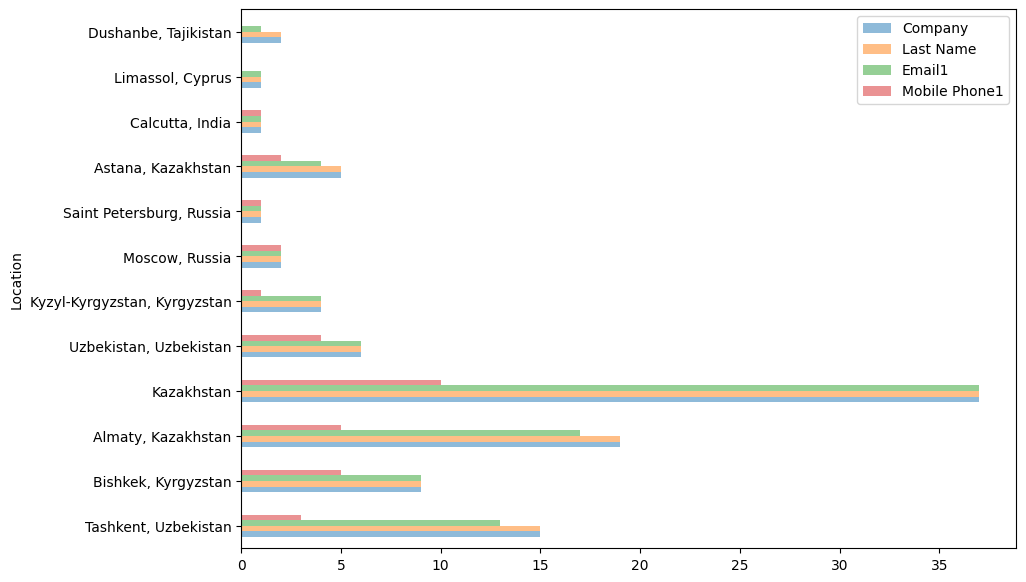

In [ ]:
pd.pivot_table(df,
               index = ['Location'],
               values = ['Company', 'Last Name', 'Email1', 'Mobile Phone1'],
               aggfunc='count', sort=False).plot.barh(figsize=(10,7), alpha=0.5)

In [ ]:
df_2 = pd.pivot_table(df,
               index = ['Location'],
               values = ['Company', 'Last Name', 'Email1', 'Mobile Phone1'],
               aggfunc='count', sort=False)

In [ ]:
with pd.ExcelWriter('Тестовое_задание_Летуновский_Михаил.xlsx') as writer:
    df.to_excel(writer, sheet_name='Table', index=False)
    df_2.to_excel(writer, sheet_name='Pivot_table')